# Parte 2: Modelado Predictivo de Churn – Telecom X

In [1]:
from google.colab import files
import pandas as pd

In [4]:
uploaded = files.upload()
df = pd.read_csv("datos_tratados.csv")
df.head()

Saving datos_tratados.csv to datos_tratados (2).csv


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,NaN,NaN,9,NaN,No,DSL,...,No,NaN,NaN,No,One year,NaN,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,NaN,NaN,DSL,...,No,No,No,NaN,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,NaN,No,Fiber optic,...,NaN,No,No,No,Month-to-month,NaN,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,NaN,No,13,NaN,No,Fiber optic,...,NaN,No,NaN,NaN,Month-to-month,NaN,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,NaN,No,3,NaN,No,Fiber optic,...,No,NaN,NaN,No,Month-to-month,NaN,Mailed check,83.9,267.40,2.796667


In [5]:
# Eliminar customerID (no para predecir)
if 'customerID' in df.columns:
    df.drop(columns=['customerID'], inplace=True)

print("Columnas después de eliminación:")
print(df.columns.tolist())

Columnas después de eliminación:
['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly', 'Charges.Total', 'Cuentas_Diarias']


### Codificación de variables categóricas (One-Hot Encoding)

In [6]:
# Identificar columnas categóricas
categorical_cols = df.select_dtypes(include='object').columns.tolist()

# Eliminar 'Churn' de las categóricas porque es el objetivo
categorical_cols.remove('Churn')

# Aplicar One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Ver resultado
print("Forma del dataset después de encoding:", df_encoded.shape)
df_encoded.head()

Forma del dataset después de encoding: (7256, 14)


,Churn,SeniorCitizen,tenure,Charges.Monthly,Charges.Total,Cuentas_Diarias,gender_Male,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,No,0,9,65.6,593.30,2.186667,False,False,False,True,False,False,False,True
1,No,0,9,59.9,542.40,1.996667,True,False,False,False,False,False,False,True
2,Yes,0,4,73.9,280.85,2.463333,True,True,False,False,False,False,True,False
3,Yes,1,13,98.0,1237.85,3.266667,True,True,False,False,False,False,True,False
4,Yes,1,3,83.9,267.40,2.796667,False,True,False,False,False,False,False,True


### Verificar balanceo de la variable objetivo (Churn)

In [7]:
churn_counts = df_encoded['Churn'].value_counts()
churn_ratio = df_encoded['Churn'].value_counts(normalize=True)

print("Distribución de Churn:")
print(churn_counts)
print("\nProporción:")
print(churn_ratio)

Distribución de Churn:
Churn
No     5163
Yes    1869
Name: count, dtype: int64

Proporción:
Churn
No     0.734215
Yes    0.265785
Name: proportion, dtype: float64


### Separar variables predictoras (X) y objetivo (y)

In [8]:
from sklearn.model_selection import train_test_split

# X = todas las columnas menos Churn
# y = Churn (convertido a 1=Yes, 0=No)
X = df_encoded.drop(columns=['Churn'])
y = df_encoded['Churn'].map({'Yes': 1, 'No': 0})  # Asegurar codificación binaria

print("Forma de X:", X.shape)
print("Forma de y:", y.shape)

Forma de X: (7256, 13)
Forma de y: (7256,)


### Limpieza segura de Churn

In [13]:
df_encoded['Churn'] = df_encoded['Churn'].astype(str).str.strip()  # quita espacios

# filas donde Churn = 'nan' o valoresinválidos
df_encoded = df_encoded[df_encoded['Churn'].isin(['Yes', 'No'])]

y = df_encoded['Churn'].map({'Yes': 1, 'No': 0})
X = df_encoded.drop(columns=['Churn'])

### Dividir en entrenamiento y prueba (70/30)

In [17]:
df_encoded['Churn'] = df_encoded['Churn'].astype(str).str.strip()

# Filtrar solo valores válidos
df_encoded = df_encoded[df_encoded['Churn'].isin(['Yes', 'No'])]

# Crear X e y
X = df_encoded.drop(columns=['Churn'])
y = df_encoded['Churn'].map({'Yes': 1, 'No': 0})

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("División completada sin errores.")
print(f"Datos de entrenamiento: {X_train.shape[0]}")
print(f"Datos de prueba: {X_test.shape[0]}")

División completada sin errores.
Datos de entrenamiento: 4922
Datos de prueba: 2110


### Normalización (solo para modelos sensibles a escala)

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# Ajustar y transformar en entrenamiento, transformar solo en prueba
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Datos normalizados para modelos basados en distancia.")

Datos normalizados para modelos basados en distancia.


## Entrenar dos modelos

### Modelo 1: Regresión Logística

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

lr = LogisticRegression(random_state=42)
lr.fit(X_train_scaled, y_train)

# Predicciones
y_pred_lr = lr.predict(X_test_scaled)

# Evaluación
print("REGRESIÓN LOGÍSTICA")
print("Exactitud:", accuracy_score(y_test, y_pred_lr))
print("\nInforme de Clasificación:")
print(classification_report(y_test, y_pred_lr))

REGRESIÓN LOGÍSTICA
Exactitud: 0.79478672985782

Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1549
           1       0.63      0.54      0.58       561

    accuracy                           0.79      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.79      0.79      0.79      2110



### Modelo 2: Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)  # usa X_train sin escalar

# Predicciones
y_pred_rf = rf.predict(X_test)

# Evaluación
print("RANDOM FOREST")
print("Exactitud:", accuracy_score(y_test, y_pred_rf))
print("\nInforme de Clasificación:")
print(classification_report(y_test, y_pred_rf))

RANDOM FOREST
Exactitud: 0.7725118483412322

Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1549
           1       0.59      0.48      0.53       561

    accuracy                           0.77      2110
   macro avg       0.71      0.68      0.69      2110
weighted avg       0.76      0.77      0.77      2110



## Comparar modelos con matriz de confusión

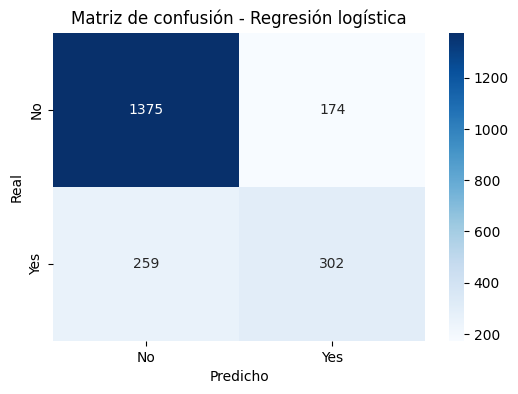

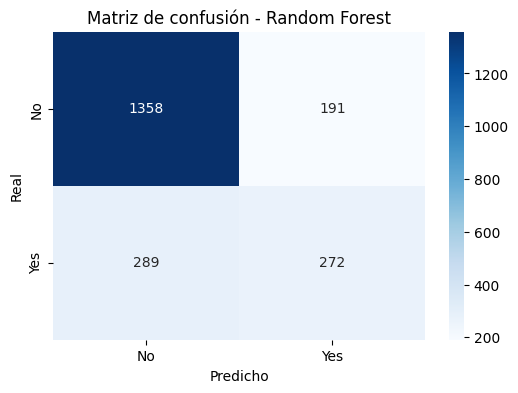

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
    plt.title(f'Matriz de confusión - {title}')
    plt.xlabel('Predicho')
    plt.ylabel('Real')
    plt.show()

plot_confusion_matrix(y_test, y_pred_lr, "Regresión logística")
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")

## Análisis de correlación

In [33]:
# Buscar columnas relacionadas con 'Churn'
print("Columnas que contienen 'Churn':")
print([col for col in df_encoded.columns if 'Churn' in col])

Columnas que contienen 'Churn':
['Churn_Yes']


In [34]:
# Si Churn fue convertido a dummies, recupera la columna binaria
if 'Churn_Yes' in df_encoded.columns:
    df_encoded['Churn'] = df_encoded['Churn_Yes']
    if 'Churn_Yes' in df_encoded.columns:
        df_encoded.drop(columns=['Churn_Yes'], inplace=True)
    if 'Churn_No' in df_encoded.columns:
        df_encoded.drop(columns=['Churn_No'], inplace=True)
elif 'Churn' not in df_encoded.columns:
    raise KeyError("La columna 'Churn' no está en el DataFrame. Revisa el preprocesamiento.")

In [35]:
# Asegurar que Churn sea int o float
df_encoded['Churn'] = pd.to_numeric(df_encoded['Churn'], errors='coerce')

# Verificar
print("Valores únicos de Churn:", df_encoded['Churn'].unique())

Valores únicos de Churn: [False  True]


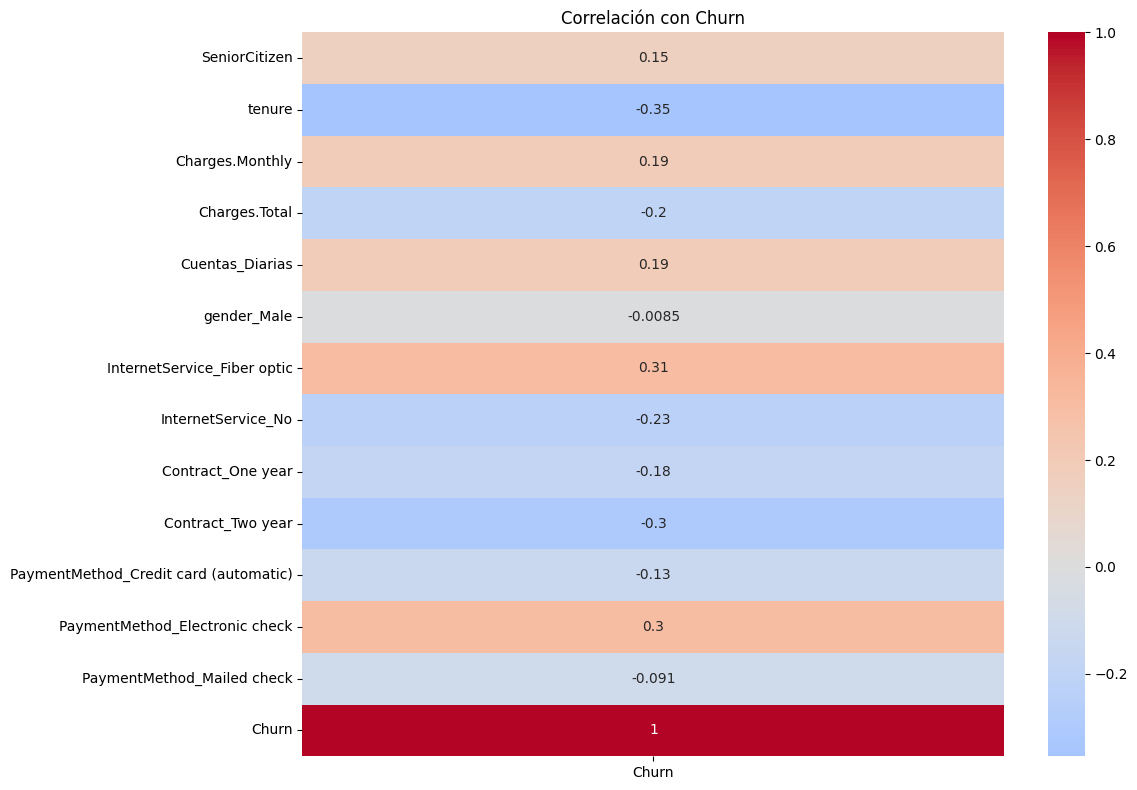

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
correlation_matrix = df_encoded.corr()
sns.heatmap(correlation_matrix[['Churn']], annot=True, cmap='coolwarm', center=0, cbar=True)
plt.title('Correlación con Churn')
plt.tight_layout()
plt.show()

### Importancia de variables (Random Forest)

/tmp/ipython-input-76570418.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')


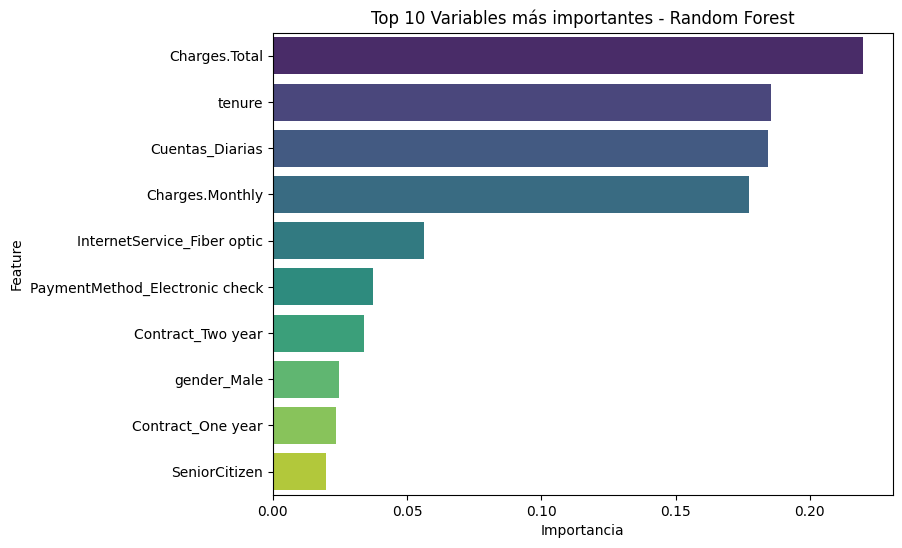

In [37]:
# Importancia de variables
importances = rf.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values('Importance', ascending=False).head(10)

# Gráfico
plt.figure(figsize=(8, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')
plt.title('Top 10 Variables más importantes - Random Forest')
plt.xlabel('Importancia')
plt.show()

### Interpretación de coeficientes (Regresión Logística)

/tmp/ipython-input-1773108539.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coef_df, x='Coefficient', y='Feature', palette='rocket')


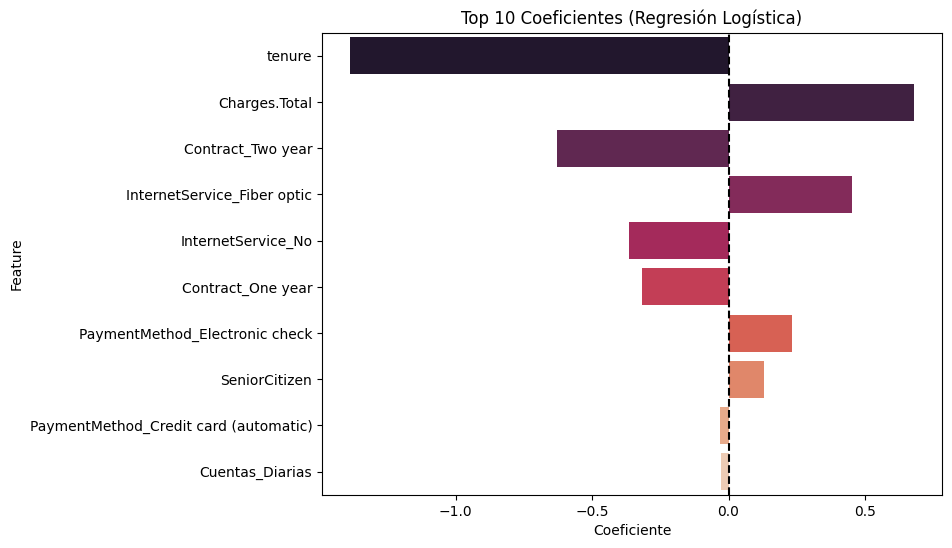

In [38]:
# Coeficientes de Regresión Logística
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr.coef_[0]
}).sort_values('Coefficient', key=abs, ascending=False).head(10)

# Gráfico
plt.figure(figsize=(8, 6))
sns.barplot(data=coef_df, x='Coefficient', y='Feature', palette='rocket')
plt.title('Top 10 Coeficientes (Regresión Logística)')
plt.axvline(0, color='black', linestyle='--')
plt.xlabel('Coeficiente')
plt.show()

## Conclusiones

- Los **clientes con contrato mensual** son los más riesgosos.
- El **precio mensual alto** y el **servicio de fibra óptica** están ligados al churn.
- La **fidelización** (contratos largos, mayor tenure) reduce la cancelación.

## Recomendaciones

1. **Ofrecer descuentos** para convertir contratos mensuales a anuales.
2. **Programa de retención** para clientes con alto `Charges.Monthly`.
3. **Auditar servicio de fibra óptica**: ¿Problemas de calidad o soporte?
4. **Alertas proactivas** para clientes nuevos con bajo tenure y alto gasto.